Python Task 3: Basic Neural Network Implementation [12 marks]

In [1]:
import torch
torch.manual_seed(1337)
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1=nn.Linear(10,5)
        self.fc2=nn.Linear(5,3)
        self.output=nn.Linear(3,1)
        
        self.relu=nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.output(x)
        return self.sigmoid(x)

In [3]:
model=SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [4]:
loss_function = nn.MSELoss()              
optimiser = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# 3b. Generate synthetic data
X=torch.randn(100,10)
y=torch.randn(100,1)

In [6]:
epochs=20
losses=[]

for epoch in range(1, epochs+1):
    optimiser.zero_grad()
    y_pred=model(X)
    loss=loss_function(y_pred, y)

    loss.backward()
    optimiser.step()
    
    losses.append(loss.item())
    print(f"Epoch {epoch:02d} | Loss: {loss.item():.6f}")

Epoch 01 | Loss: 1.439073
Epoch 02 | Loss: 1.438447
Epoch 03 | Loss: 1.437823
Epoch 04 | Loss: 1.437200
Epoch 05 | Loss: 1.436577
Epoch 06 | Loss: 1.435957
Epoch 07 | Loss: 1.435337
Epoch 08 | Loss: 1.434718
Epoch 09 | Loss: 1.434101
Epoch 10 | Loss: 1.433485
Epoch 11 | Loss: 1.432870
Epoch 12 | Loss: 1.432257
Epoch 13 | Loss: 1.431644
Epoch 14 | Loss: 1.431033
Epoch 15 | Loss: 1.430424
Epoch 16 | Loss: 1.429815
Epoch 17 | Loss: 1.429207
Epoch 18 | Loss: 1.428601
Epoch 19 | Loss: 1.427996
Epoch 20 | Loss: 1.427393


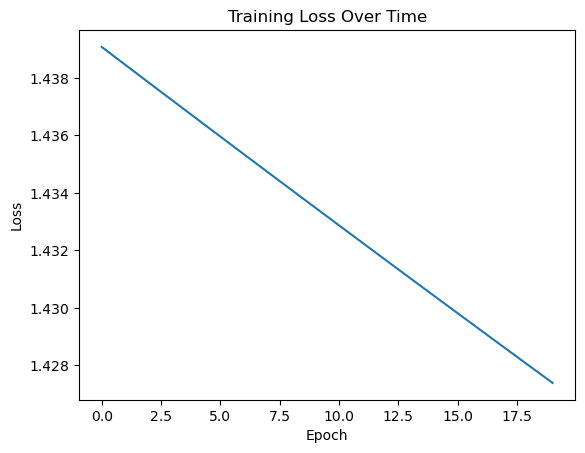

In [7]:
# plt.plot(range(1, epochs+1), losses)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()